## ビームのCCD画像から射影とガウスフィットするプログラム
## 複数一気に処理するバージョン(作成途中)

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from scipy.stats import norm

In [2]:
img = Image.open('hoge1/1.tif')

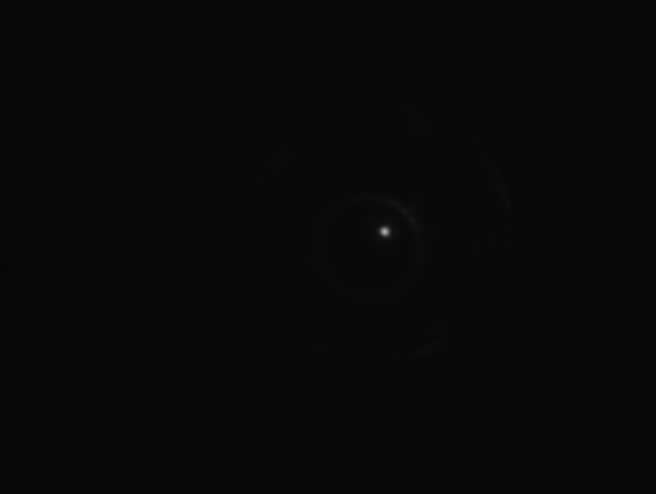

In [3]:
img

In [4]:
print(img.height, type(img), img.size, img.mode) # Lは8bit pixel

494 <class 'PIL.TiffImagePlugin.TiffImageFile'> (656, 494) L


In [5]:
Y = np.array(img) #画像の輝度値を配列に

In [6]:
#np.savetxt('test.csv', Y, delimiter = ',') #輝度値の配列をcsvに書き出し

In [7]:
Y1 = Y.sum(0)   #輝度値の足し合わせ　縦方向　
Y1min = min(Y1)
Y_geta = Y1-Y1min
Y_geta_max = max(Y_geta)

YY = Y_geta/Y_geta_max # 下駄を差し引いて規格化

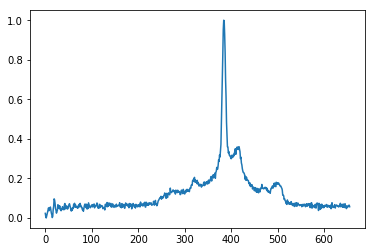

In [8]:
plt.plot(YY)
plt.show()

In [9]:
#param = norm.fit(YY) #これはまだよくわかってない　以下使っていない scipy.stats.norm.fitは謎
#print(param)

In [10]:
def gaussian(x, A, mean, sigma, base):
    gauss = A * np.exp(-((x-mean)/sigma)**2/2) + base
    return(gauss)

In [11]:
XX = np.array(range(len(YY))) + 1 # x軸を作成　最初が0でなく1になるように1を足す.
XX

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
p0 = np.array([1, 386, 5, 0.1]) #初期値の推定 [A, mean, sigma, base]の順番

In [13]:
para_opt, cov = curve_fit(gaussian, XX, YY, p0)
print('y = A * np.exp(-((x-mean)/sigma)**2/2) + base')
print('parameter A = ', str(para_opt[0]), '±', str(np.sqrt(cov[0][0])))
print('parameter mean = ', str(para_opt[1]), '±', str(np.sqrt(cov[1][1])))
print('parameter sigma = ', str(para_opt[2]), '±', str(np.sqrt(cov[2][2])))
print('parameter base = ', str(para_opt[3]), '±', str(np.sqrt(cov[3][3])))
print('共分散cov を一応以下に表示')
print(cov)

y = A * np.exp(-((x-mean)/sigma)**2/2) + base
parameter A =  0.735312643415 ± 0.024779482871
parameter mean =  385.798386409 ± 0.249970787889
parameter sigma =  6.44440508281 ± 0.252256342703
parameter base =  0.103369360259 ± 0.00273386781922
共分散cov を一応以下に表示
[[  6.14022771e-04   3.18933316e-09  -3.49979815e-03  -5.28493952e-06]
 [  3.18933316e-09   6.24853948e-02  -2.79949127e-08  -3.29061634e-13]
 [ -3.49979815e-03  -2.79949127e-08   6.36332624e-02  -9.26239519e-05]
 [ -5.28493952e-06  -3.29061634e-13  -9.26239519e-05   7.47403325e-06]]


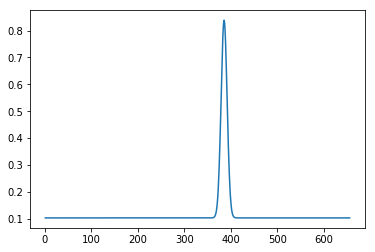

In [14]:
YY1 = para_opt[0] * np.exp(-((XX-para_opt[1])/para_opt[2])**2/2) + para_opt[3]
plt.plot(XX, YY1)
plt.show()

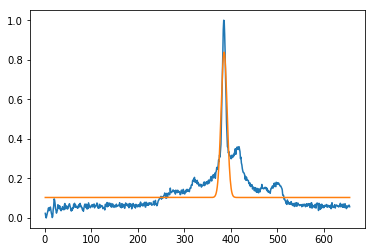

In [15]:
plt.plot(XX, YY)
plt.plot(XX, YY1)
plt.show()

## 以下フィッティング具合を表すR^2を計算する
web の getting the r-squared value using curve_fit を参考にした

$$
R^2 = 1 - SS_{res}/SS_{tot} \\
SS_{res} = \Sigma(y_{i}-f_{i})^2 ,
SS_{tot} = \Sigma(y_{i} - y_{mean})^2 ,
        y_{mean} = \frac{\Sigma(y_{i})}{n}
$$

In [16]:
residuals = YY - YY1
SS_res = np.sum(residuals**2) # residual sum of squares

SS_tot = np.sum((YY-np.mean(YY))**2) # total sum of squares

RR = 1 - (SS_res/SS_tot)
print('R^2 =', RR)
print('R =', np.sqrt(RR)) #R^2が1に近いほど良いfit

R^2 = 0.663008239903
R = 0.814253179241


## ここまでは1枚の画像に対してだったので複数枚処理するプログラムを。